# Groupwork Assignment Submission 1 M3

**Note**: Only first 5 rows of most dataframes shown to reduce the file size below the 5MB threshold for the WQU platform to accept it.

# 1.1	What is an Exchange-Traded Fund (ETF)?

Exchange-Traded Fund (ETF) is a type of security that combines the characteristics and potential benefits of tracks an index, sector, commodity, or other asset and are traded in a stock market. ETF shares, like individual stocks, are traded throughout the day at varying prices based on supply and demand.

In [3]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 1.2 Pick 1 of the funds in the data set, and find the weightings.  Show in Python table

In [4]:
# Data in Excel file downloaded from https://app2.msci.com/eqb/custom_indexes/india_performance.html
weightings = pd.read_excel('msci_india_performance.xls', index_col = 0, header = 11, skipfooter = 46)

with pd.option_context("display.max_rows", 1000, "display.max_columns", 100):
    display(weightings.head(5))

,Security Name,Price,Currency,Shares FIF Adjusted,Weight%,Price Adj. Factor,Price Adj. Factor Description,FX Rate,Country,Reuters Code (RIC),Currency Next Day
MSCI Code,,,,,,,,,,,
1614701,RELIANCE INDUSTRIES,2408.25,INR,2.852749e+09,9.57,1,NaN,1.0,IN,RELI.NS,INR
2273401,INFOSYS,1735.55,INR,3.407269e+09,8.23,1,NaN,1.0,IN,INFY.NS,INR
1611601,HOUSING DEV FINANCE CORP,2771.65,INR,1.716345e+09,6.62,1,NaN,1.0,IN,HDFC.NS,INR
2424901,ICICI BANK,716.30,INR,5.128582e+09,5.11,1,NaN,1.0,IN,ICBK.NS,INR
2934401,TATA CONSULTANCY,3640.45,INR,9.247628e+08,4.69,1,NaN,1.0,IN,TCS.NS,INR


#### 2.1 Import the data from the csv file

In [5]:
# reading csv file
data = pd.read_csv('MScFE 650 MLF GWP Data.csv', index_col=0, parse_dates=True)

In [6]:
# weighted average for LUXXX

weighted = data.groupby("Date")["LUXXX"].mean()
print (weighted)

Date
2016-01-01    1390.716
2016-01-08    1291.267
2016-01-15    1257.086
2016-01-22    1254.167
2016-01-29    1298.240
                ...   
2020-09-25     988.345
2020-10-02    1037.211
2020-10-09    1075.670
2020-10-16    1068.089
2020-10-23    1090.573
Name: LUXXX, Length: 252, dtype: float64


# 3.1 Summarize the min, max, mean, median, and standard deviation of each column

In [7]:
data.describe()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,...,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,...,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,...,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,...,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,...,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,...,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,...,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


# 4.1 Write a Python function that graphs 1 time series with appropriate time labels

In [8]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

data["LUXXX"].plot(title='LUXXX', ylabel="Price")

<AxesSubplot:title={'center':'LUXXX'}, xlabel='Date', ylabel='Price'>

# 4.2 Write a Python function that graphs 2 time series on the same plot, with labels

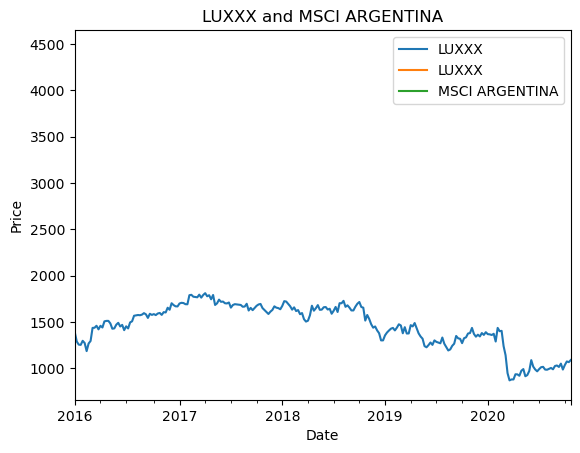

In [9]:
plt.plot(data['LUXXX'], label="LUXXX")
plt.plot(data['MSCI ARGENTINA'], label="MSCI ARGENTINA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("LUXXX and MSCI ARGENTINA")
plt.legend()
plt.show()

# 4.3 Write a Python function that compares the 2 return series

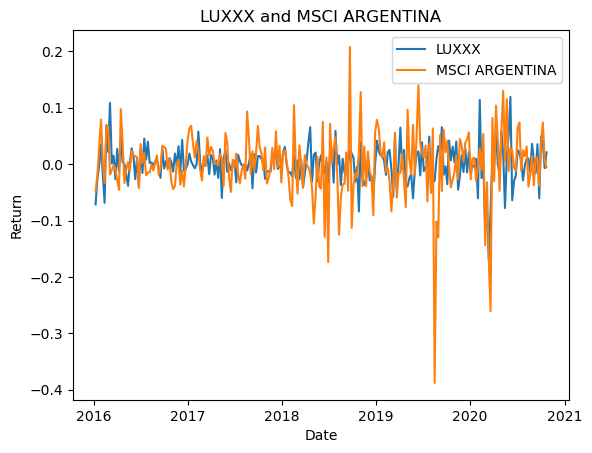

In [10]:
change = data.pct_change()
ret = change[1:]

plt.plot(ret['LUXXX'], label="LUXXX")
plt.plot(ret['MSCI ARGENTINA'], label="MSCI ARGENTINA")
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("LUXXX and MSCI ARGENTINA")
plt.legend()
plt.show()

# 5.1 Compute the correlation using Pearson correlation

In [11]:
data.corr(method="pearson")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,...,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,...,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,...,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,...,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,...,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.209736,-0.036849,-0.369143,-0.616392,...,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,1.000000,0.732142,0.465766,-0.083163,...,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,1.000000,0.676746,0.335889,...,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,1.000000,0.602393,...,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,1.000000,...,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


# 5.2 Recompute the calculation, instead of using Spearman correlation

In [12]:
data.corr(method="spearman")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.171258,0.014335,-0.116688,-0.538869,...,0.135903,0.284113,-0.189760,0.421563,0.386641,0.696801,-0.108966,-0.443921,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.189584,-0.174087,-0.049772,-0.421900,...,-0.085017,0.211169,-0.274679,0.416496,0.515793,0.611122,-0.263058,-0.502658,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.022868,-0.222396,-0.415513,-0.453115,...,-0.270019,-0.103185,-0.373495,0.187038,0.241724,0.503483,-0.316342,-0.548127,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.702757,0.936633,0.545906,0.408691,...,0.830269,0.706822,0.838601,0.689851,0.494837,0.493137,0.749297,0.714589,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.674107,0.472486,0.446277,-0.078353,...,0.712182,0.797891,0.403134,0.902973,0.726394,0.878057,0.324909,0.128467,0.846133,0.121610
MSCI BELGIUM,0.728380,0.815686,0.881598,-0.222302,0.368606,1.000000,0.014034,-0.221215,-0.307498,-0.368589,...,-0.235713,-0.050673,-0.410777,0.238371,0.415367,0.527247,-0.300457,-0.530308,0.417859,-0.660276
MSCI BRAZIL,0.171258,0.189584,0.022868,0.702757,0.674107,0.014034,1.000000,0.615794,0.413264,0.104694,...,0.689064,0.809696,0.769487,0.792500,0.567375,0.602130,0.425370,0.425297,0.595758,0.389331
MSCI CANADA,0.014335,-0.174087,-0.222396,0.936633,0.472486,-0.221215,0.615794,1.000000,0.635031,0.471316,...,0.813339,0.649712,0.809950,0.625193,0.486469,0.444318,0.817390,0.739852,0.604094,0.766393
MSCI CHINA,-0.116688,-0.049772,-0.415513,0.545906,0.446277,-0.307498,0.413264,0.635031,1.000000,0.608738,...,0.629511,0.535999,0.589147,0.485453,0.469770,0.282470,0.723844,0.689994,0.323534,0.751277
MSCI DENMARK,-0.538869,-0.421900,-0.453115,0.408691,-0.078353,-0.368589,0.104694,0.471316,0.608738,1.000000,...,0.259644,0.009157,0.416429,0.080001,0.151474,-0.061556,0.676213,0.826300,-0.029171,0.733555


# 5.3 Recompute the calculation, instead of using Kendall correlation

In [13]:
data.corr(method="kendall")

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580861,0.026877,0.457578,0.533989,0.110099,0.052488,-0.058753,-0.365459,...,0.116739,0.192977,-0.093657,0.283916,0.277719,0.513574,-0.039841,-0.256976,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547910,-0.091383,0.382000,0.601097,0.158351,-0.084424,-0.022009,-0.242965,...,-0.013849,0.188740,-0.153292,0.289924,0.368595,0.408525,-0.144628,-0.281830,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580861,0.547910,1.000000,-0.117454,0.234036,0.704980,0.030232,-0.115679,-0.250095,-0.306242,...,-0.116817,-0.046962,-0.190564,0.158721,0.173331,0.354054,-0.205743,-0.350679,0.263804,-0.425590
MSCI AUSTRALIA,0.026877,-0.091383,-0.117454,1.000000,0.340839,-0.131216,0.522182,0.785012,0.369162,0.297233,...,0.625075,0.497304,0.665802,0.483075,0.331800,0.303170,0.575557,0.566744,0.433455,0.599336
MSCI AUSTRIA,0.457578,0.382000,0.234036,0.340839,1.000000,0.273741,0.485153,0.324764,0.400430,-0.047307,...,0.516966,0.592205,0.284160,0.744375,0.547996,0.704005,0.250830,0.113558,0.677165,0.117130
MSCI BELGIUM,0.533989,0.601097,0.704980,-0.131216,0.273741,1.000000,0.022485,-0.126279,-0.180685,-0.238232,...,-0.104837,-0.023403,-0.244746,0.178684,0.303163,0.415143,-0.189592,-0.321505,0.321089,-0.430069
MSCI BRAZIL,0.110099,0.158351,0.030232,0.522182,0.485153,0.022485,1.000000,0.452413,0.319757,0.097704,...,0.503889,0.641286,0.581737,0.588354,0.390666,0.405806,0.298236,0.326667,0.410042,0.321634
MSCI CANADA,0.052488,-0.084424,-0.115679,0.785012,0.324764,-0.126279,0.452413,1.000000,0.446180,0.324670,...,0.621451,0.466997,0.638462,0.440625,0.331916,0.295318,0.636375,0.559896,0.443875,0.594890
MSCI CHINA,-0.058753,-0.022009,-0.250095,0.369162,0.400430,-0.180685,0.319757,0.446180,1.000000,0.430686,...,0.452568,0.430534,0.424741,0.451658,0.351479,0.249545,0.540665,0.510854,0.281495,0.587971
MSCI DENMARK,-0.365459,-0.242965,-0.306242,0.297233,-0.047307,-0.238232,0.097704,0.324670,0.430686,1.000000,...,0.164675,0.009075,0.282869,0.075414,0.124045,-0.035765,0.492127,0.632686,-0.011257,0.554733


# 6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)



In [14]:
# We chose LUXXX as our response variable
Y = data.LUXXX
Y

Date
2016-01-01    1390.716
2016-01-08    1291.267
2016-01-15    1257.086
2016-01-22    1254.167
2016-01-29    1298.240
                ...   
2020-09-25     988.345
2020-10-02    1037.211
2020-10-09    1075.670
2020-10-16    1068.089
2020-10-23    1090.573
Name: LUXXX, Length: 252, dtype: float64

# 7.1 Use the Pearson correlation matrix

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(60,60))
corr_heatmap = sns.heatmap(data.corr(method="pearson"), annot = True, annot_kws={'fontsize': 25})
corr_heatmap
sns.set(font_scale = 10)

# 7.2 Show the amount of variation explained by the first 5 components

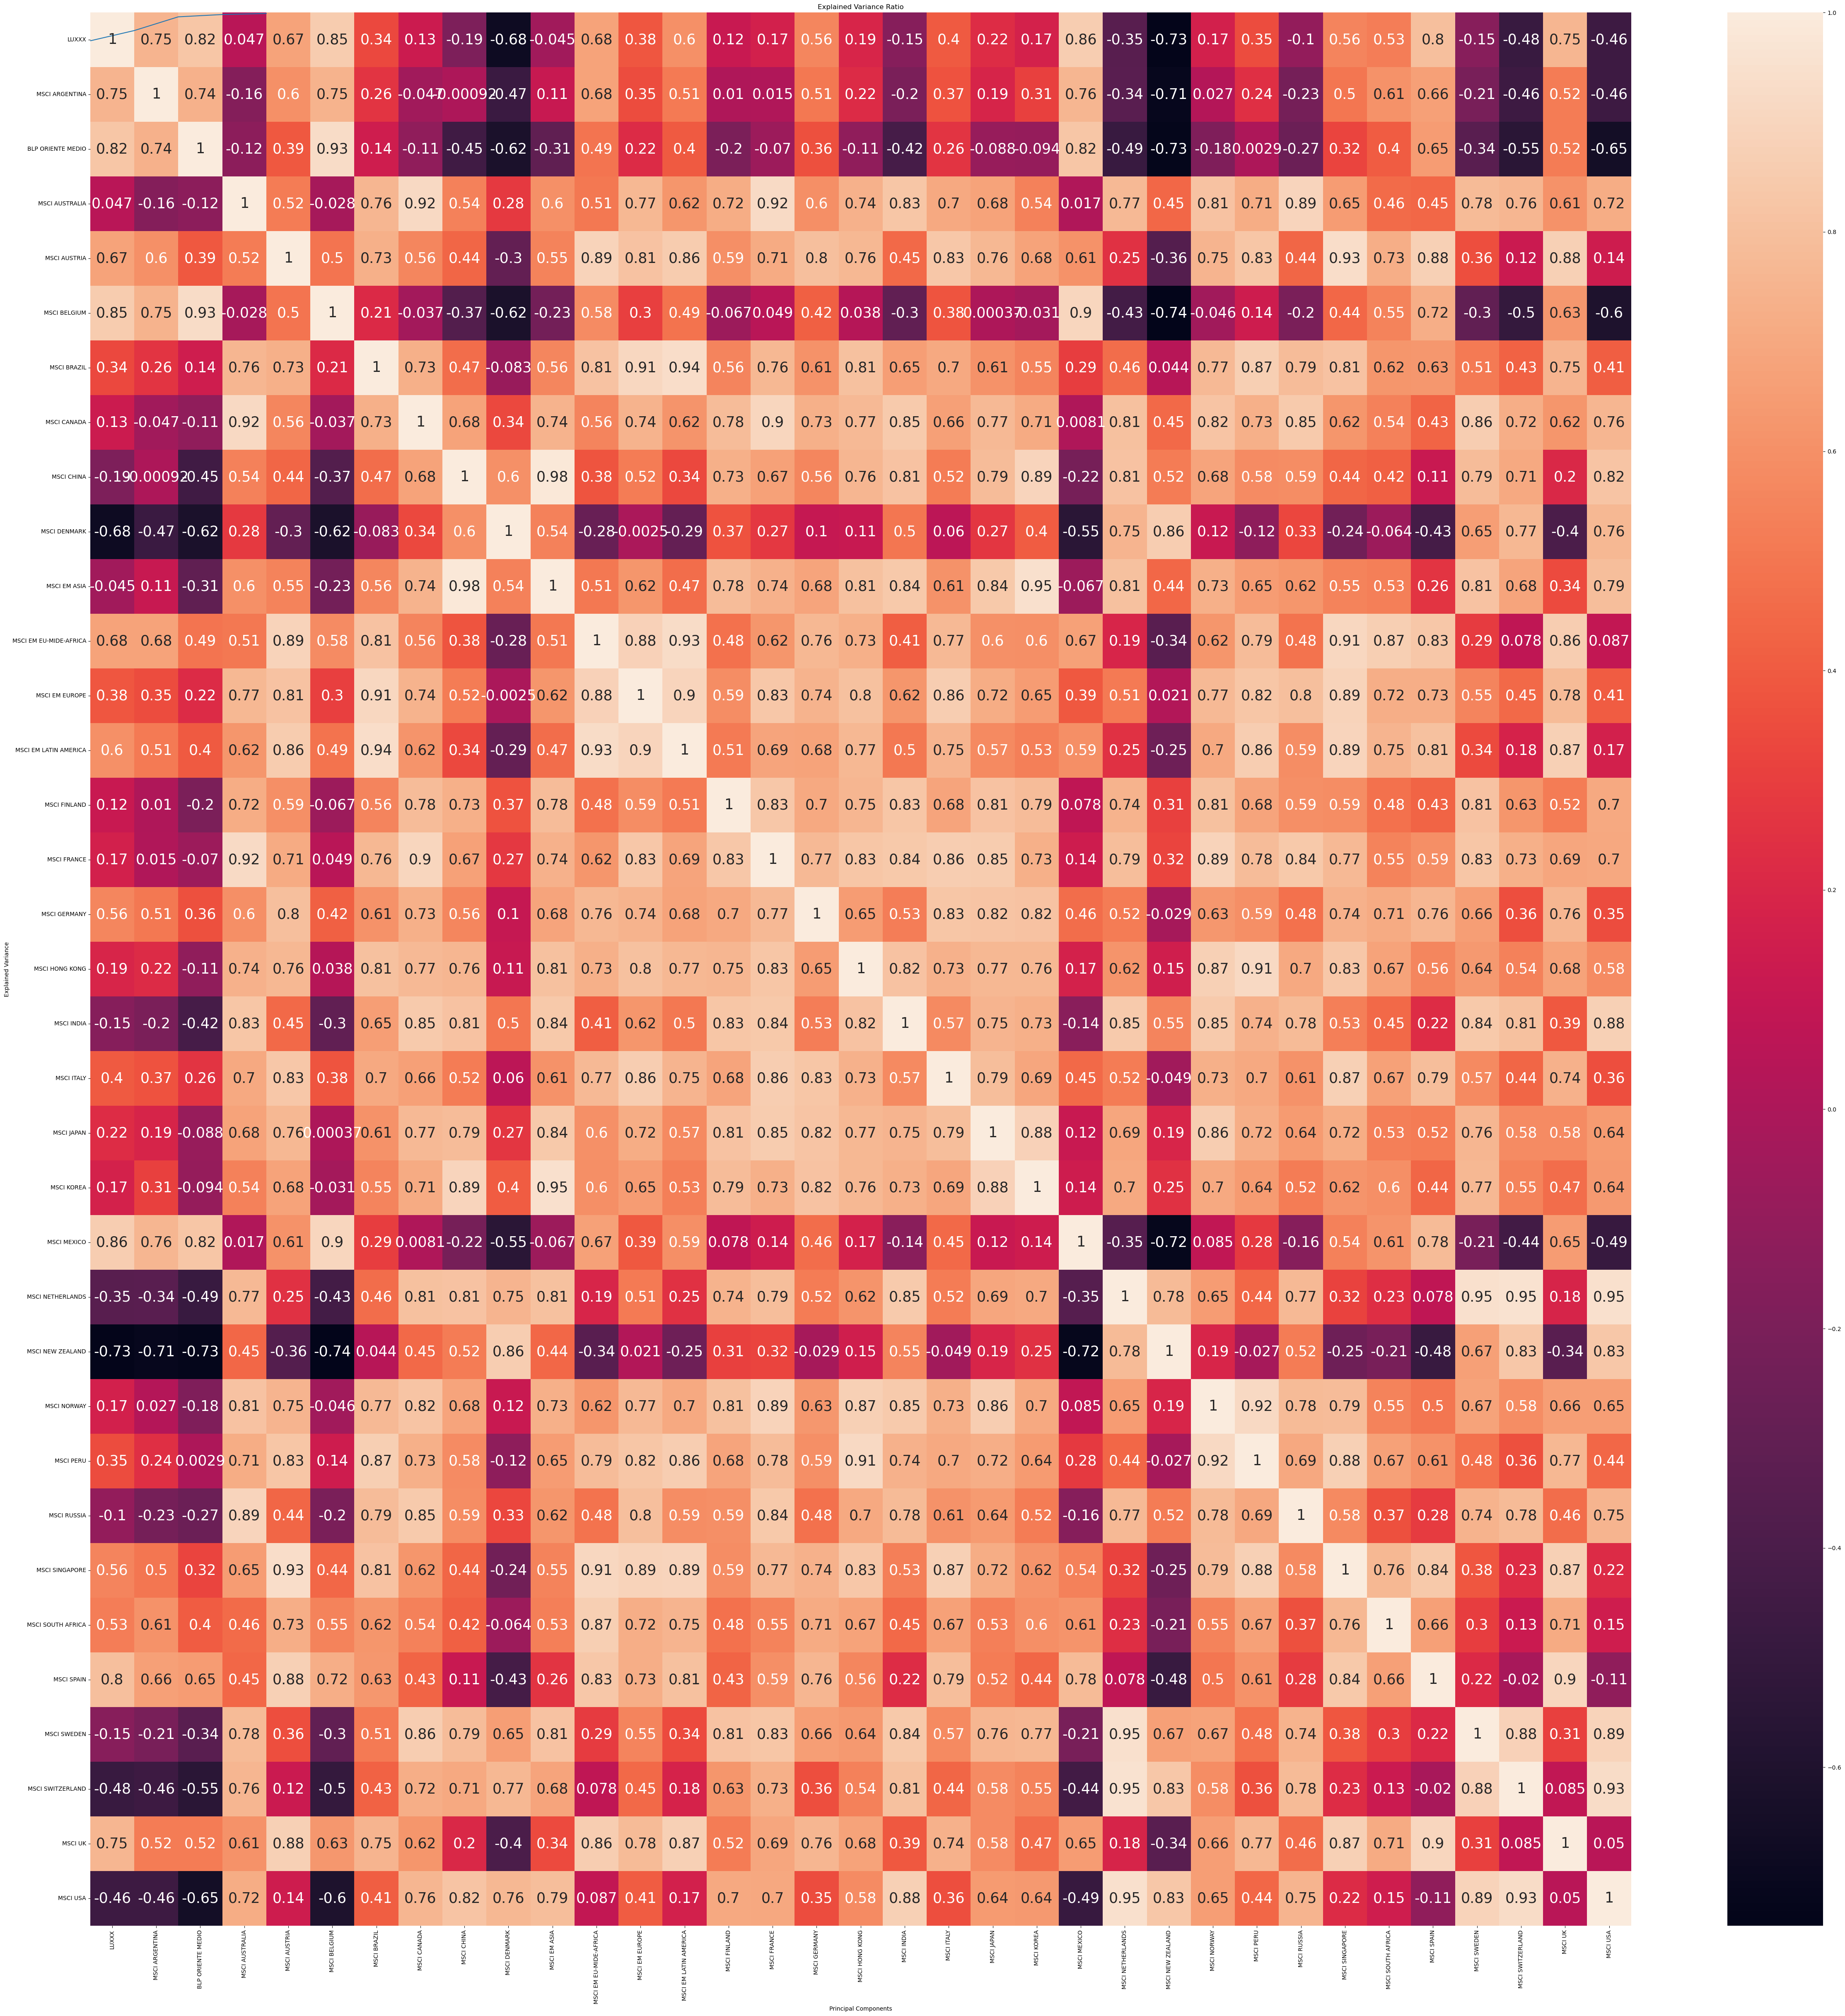

In [16]:
rcParams.update(rcParamsDefault)
pca = PCA(n_components=5)
pca.fit(data.iloc[:, 1:], data.iloc[:, 0])

plt.plot(range(0, 5), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')

plt.show()

# 7.3 How many components are needed to express 80% of the variation of the data?


In [17]:
explained_var = 0
num_components = 0
for i in range(0,5):
    explained_var += pca.explained_variance_ratio_[i]
    num_components = num_components + 1
    if explained_var >= 0.8:
        break

print("Number of principal components to explain 80 percent variation: %s" % num_components)

Number of principal components to explain 80 percent variation: 2


In [18]:
pca.explained_variance_ratio_

array([0.51756363, 0.33009646, 0.07894327, 0.03678651, 0.01779009])

# 7.4 What is your interpretation of the 1st component?

The first component accounts for more than half of the variance and is an indication that the data is widely disseminated. 

# 8 We will use PCA and the lasso regression

### 8.1 What do these 2 methodologies have in common?

Both PCA and LASSO project the data on a lower dimensional space, i.e. reduced  number of variables used in modelling the data.

### 8.2 How do these 2 methodologies differ?

The two methodologies differ in the way variable reduction is achieved. PCA will transform the dataset to a new set of variables which are called principal componenents (or, eigenvectors of the covariance matrix) and LASSO is a form of linear regression which uses shrinkage; it applies L1 regularizaion and it adds a penalty which is equivalent to the magnitude of the coefficients.

PCA is an unsupervised learning technique that aims to maximize the variance across the entire dataset whereas Lasso is a supervised regularization method that is based on minimizing Mean Squared Error.

# 9 PCA Regression and Lasso Regression

## 9.1 Run a regression of Y versus the PCA scores

In [19]:
from sklearn.preprocessing import StandardScaler
X = data.loc[:, data.columns != 'LUXXX'] #Change 2: Defined X
X_normalized=StandardScaler().fit_transform(X)
X_r = pca.fit(X_normalized).transform(X_normalized)
X_r.shape

reg_PCA = LinearRegression()
reg_PCA.fit(X_r, Y)
print("Regression score")
reg_PCA.score(X_r, Y)

Regression score


0.8737184106725847

# 10 Lasso Regression

## 10.1 Run a linear regression of Y versus the other predictors

In [20]:
# Fitting the model
regr_linear = LinearRegression()
regr_linear.fit(X_normalized, Y)

X_normalized = pd.DataFrame(X_normalized, columns = X.columns)

# Model parameters (excludes intercept term)
parameters_linear = pd.DataFrame(regr_linear.coef_, X_normalized.columns, columns=['Param. Linear Reg.'])
parameters_linear

,Param. Linear Reg.
MSCI ARGENTINA,-60.943231
BLP ORIENTE MEDIO,15.563304
MSCI AUSTRALIA,1.316891
MSCI AUSTRIA,42.764332
MSCI BELGIUM,28.413959
MSCI BRAZIL,-165.340743
MSCI CANADA,55.447187
MSCI CHINA,-51.731796
MSCI DENMARK,35.764730
MSCI EM ASIA,141.420991


In [21]:
# R-squared
print("Regression score")
regr_linear.score(X_normalized, Y)

#Maybe we can add some visualisation and t-stats etc. later

Regression score


0.9806055317363801

## 10.2 For the lasso, use at least 1000 different values of the penalty parameter

In [22]:
penalty_values = np.linspace(1, 100, 1000)
len(penalty_values)

1000

## 10.3 Split the data into testing and training, with 2/3 for training and 1/3 for testing

In [23]:
# Randomizing the data and splitting into train and test sets
data_train, data_test = train_test_split(data, test_size = 1/3, shuffle = True, random_state = 1)

Y_train = data_train.LUXXX
X_train = data_train.loc[:, data.columns != 'LUXXX']
X_train_normalized = StandardScaler().fit_transform(X_train)

Y_test = data_test.LUXXX
X_test = data_test.loc[:, data.columns != 'LUXXX']
X_test_normalized = StandardScaler().fit_transform(X_test)

In [24]:
# Fitting the LASSO regression model with different penalty values
param_matrix = np.empty((0,34))
r_sq = np.empty((0,1))
Y_hat = np.empty((0,84))

for value in penalty_values.tolist():
    regr_lasso = Lasso(alpha = value)
    regr_lasso.fit(X_train_normalized, Y_train)
    regr_lasso.predict(X_test_normalized)
    
    # Appending the relevant model parameters into matrices
    param_matrix = np.append(param_matrix, regr_lasso.coef_.reshape(1,34), axis = 0)
    r_sq = np.append(r_sq, np.array(regr_lasso.score(X_train_normalized, Y_train)).reshape(1,1), axis = 0)
    Y_hat = np.append(Y_hat, np.array(regr_lasso.predict(X_test_normalized)).reshape(1,84), axis = 0)

In [25]:
# Summary table of relevant model parameters
col = X_train.columns
ind = ['Param_Val_%d'%i for i in range(1,1001)]
param_matrix = pd.DataFrame(param_matrix, index=ind, columns=col)

param_matrix.insert(0, 'Penalty Param.', penalty_values)
param_matrix.insert(1, 'R-squared', r_sq)

param_matrix.head(5)

,Penalty Param.,R-squared,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Param_Val_1,1.000000,0.972930,-11.445902,11.639982,-0.0,11.387075,8.038100,0.0,61.609259,-0.000000,...,0.0,0.0,0.0,0.0,-26.579737,43.736911,3.124310,-113.513154,36.976982,0.0
Param_Val_2,1.099099,0.972329,-8.277113,12.506440,-0.0,9.659446,6.754166,0.0,60.813966,-0.000000,...,0.0,0.0,0.0,0.0,-26.600239,41.455546,2.305163,-113.577736,40.350611,0.0
Param_Val_3,1.198198,0.971518,-4.223826,13.020354,-0.0,6.254091,5.051413,0.0,59.853698,-0.053479,...,0.0,0.0,0.0,0.0,-26.299416,38.228978,1.198066,-111.969778,43.106470,0.0
Param_Val_4,1.297297,0.970578,-0.000000,13.322910,-0.0,3.072477,3.124056,0.0,58.442015,-2.479662,...,0.0,0.0,0.0,0.0,-26.022730,34.225595,0.000000,-111.775696,45.320430,0.0
Param_Val_5,1.396396,0.970086,-0.000000,14.283498,-0.0,1.635137,1.947939,0.0,56.097396,-2.478299,...,0.0,0.0,0.0,0.0,-25.036035,32.509848,0.000000,-112.009501,46.780393,0.0


## 10.4 Graph the overall model mismatch for each of the 1000 values of the paramter

In [26]:
# Matrix of Predictions for 84 Test Examples Corresponding to Different Penalty Parameters
col = ['Test_Eg._%d'%i for i in range(1,85)]
ind = ['Model_No._%d'%i for i in range(1,1001)]
prediction_matrix = pd.DataFrame(Y_hat, index = ind, columns = col)

In [27]:
# Deviation of the Predicted Value from the Actual Value
model_mismatch = prediction_matrix.subtract(Y_test.to_numpy(), axis = 1)

In [28]:
# Quantifying overall model mismatch with RMSE for varying regularisation parameter levels
rmse = np.empty((0,1))
for row in prediction_matrix.to_numpy():
    rmse = np.append(rmse, mean_squared_error(Y_test, row, squared = False).reshape(1,1), axis = 0)

plt.plot(penalty_values, rmse)
plt.xlabel('Regularization Parameter Values')
plt.ylabel('Root Mean Squared Error')
plt.title('Quantifying Overall Model Mismatch with RMSE for varying Regularisation Parameter Levels')

Text(0.5, 1.0, 'Quantifying Overall Model Mismatch with RMSE for varying Regularisation Parameter Levels')

## 10.5 Find a lasso model that includes no more than 7 predictors

In [29]:
y = data.iloc[:, 0]
x = data.iloc[:, 1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

model = Lasso(alpha=0.1)
model.fit(x, y)

tuples = []
for i,v in enumerate(model.coef_):
    tuples.append((i, v))
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# choose the 7 most important predictiors by the coefficient
tuples.sort(key = lambda x: abs(x[1]), reverse=True)

topPredictors = pd.DataFrame()
for i in range(0,7):
    curSer = x.iloc[:, tuples[i][0]]
    topPredictors[curSer.name] = curSer
    
topPredictors

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142482.22375812806, tolerance: 1429.076457538972
  model = cd_fast.enet_coordinate_descent(


,MSCI ITALY,MSCI SPAIN,MSCI GERMANY,MSCI NETHERLANDS,MSCI BELGIUM,MSCI FRANCE,MSCI AUSTRIA
Date,,,,,,,
2016-01-01,61.26,108.40,140.65,120.08,105.38,131.10,106.70
2016-01-08,56.94,101.00,129.12,112.38,99.35,122.85,97.66
2016-01-15,54.86,97.34,125.17,110.37,97.32,119.45,93.54
2016-01-22,54.36,99.21,128.08,114.75,100.73,123.00,95.79
2016-01-29,53.16,100.06,128.32,117.19,103.05,125.61,96.93
...,...,...,...,...,...,...,...
2020-09-25,48.90,78.45,140.60,163.96,64.63,137.63,84.95
2020-10-02,49.52,79.97,143.29,169.19,66.00,140.51,84.89
2020-10-09,50.76,82.44,147.24,173.03,69.35,144.34,90.01


In [30]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(topPredictors, y, test_size=0.333)

model = Lasso(alpha=0.1)
model.fit(x_train7, y_train7)

print("Lasso top 7 predictors MSE: %f" % (sum((model.predict(x_test7) - y_test7)**2)/len(y_test7)))

Lasso top 7 predictors MSE: 3475.217364


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# mean_squared_error(model.predict(x_test7),  y_test7)
r2_score(model.predict(x_test7),  y_test7)

0.9312249228130243

In [32]:
#List of models with 7 or fewer non-zero predictors
models_7orless = param_matrix
no_predictors = models_7orless.iloc[:, 2:].astype(bool).sum(axis=1)
models_7orless.insert(2, '# Non-zero Predictors', no_predictors)
models_7orless = models_7orless[models_7orless['# Non-zero Predictors'] <= 7]

with pd.option_context("display.max_rows", 1000, "display.max_columns", 100):
    display(models_7orless.head(5))

,Penalty Param.,R-squared,# Non-zero Predictors,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Param_Val_55,6.351351,0.944752,7,0.0,18.514175,-0.0,0.0,0.0,0.0,5.644907,-0.0,-35.256806,-0.0,0.0,-0.0,0.0,0.0,-0.0,85.721335,-0.0,-0.0,-0.0,0.0,0.0,44.119424,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-85.146747,68.765104,-0.0
Param_Val_56,6.450450,0.944518,7,0.0,18.594508,-0.0,0.0,0.0,0.0,4.898522,-0.0,-35.095172,-0.0,0.0,-0.0,0.0,0.0,-0.0,85.571224,-0.0,-0.0,-0.0,0.0,0.0,43.999680,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-84.665207,69.310543,-0.0
Param_Val_57,6.549550,0.944280,7,0.0,18.674366,-0.0,0.0,0.0,0.0,4.152593,-0.0,-34.934767,-0.0,0.0,-0.0,0.0,0.0,-0.0,85.421855,-0.0,-0.0,-0.0,0.0,0.0,43.880754,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-84.182987,69.854299,-0.0
Param_Val_58,6.648649,0.944039,7,0.0,18.751772,-0.0,0.0,0.0,0.0,3.408988,-0.0,-34.780700,-0.0,0.0,-0.0,0.0,0.0,-0.0,85.276337,-0.0,-0.0,-0.0,0.0,0.0,43.766047,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-83.697242,70.389377,-0.0
Param_Val_59,6.747748,0.943794,7,0.0,18.831428,-0.0,0.0,0.0,0.0,2.663251,-0.0,-34.620817,-0.0,0.0,-0.0,0.0,0.0,-0.0,85.127286,-0.0,-0.0,-0.0,0.0,0.0,43.647470,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-83.214730,70.932416,-0.0


In [33]:
plt.plot(models_7orless['Penalty Param.'], models_7orless['# Non-zero Predictors'])
plt.xlabel('Regularization Parameter Values')
plt.ylabel('# Non-zero Predictors')
plt.title('Evolution of No. of Non-zero Predictors for Varying Levels of Regularisation')

Text(0.5, 1.0, 'Evolution of No. of Non-zero Predictors for Varying Levels of Regularisation')

# 11 Which model - PCA regression or lasso -- provides a better fit to the data?  Why?

Due to its dimensionality reduction technique, PCA provides a better fit to the data. It reduces the number of features but at the same time, it does not add much on the interpretability. PCA results into a better fit because it preserves the maximum variance.

# 12 Which model provides better interpretation of the results?

The penalty (L1 regularization) in Lasso regression enables one to carry out feature selection by reducing the unimportant coefficients to zero or near-zero values. On the other hand, PCA results in vectors which are linear combinations of the initial features.

That said, the interpretation of the feature selection done with the Lasso regression is more clear. If, based on Lasso regression, a feature is discarded, one can conclude that it is not have a statistically significant linear influence. On the other hand, the principal components one discards with PCA are linear combinations of the original features, and they do not necessarily have a meaningful interpretation in the context of the problem. 

For example, if we discard Y6 and that 
$$
Y_{6}=2 X_{1}-8 X_{2}-23 X_{3}+1.6 X_{4}
$$
then even if we know the meaning of X1, X2, X3, and X4, it is hard to interpret Y6.